In [1]:
import h5py
import numpy as  np
from tqdm import  trange
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.image
from source import helper
plt.rcParams["figure.figsize"] = (20,5)
plt.rcParams["image.interpolation"] = 'none'

In [2]:
# RADAR_DIR = Path("C:/Users/rafal/PycharmProjects/fmcw_classifier/data")  # change to your project dir
# GROUP_NAME = '2023_03_21' # nazwa grupy (np. dzień pomiaru), de facto to tylko kolejny wymiar
H5_FILENAME = 'final_dataset'
loaded_file = h5py.File('data/'+ H5_FILENAME + '.h5','r')
# loaded_file['2023_03_21'].keys()

In [3]:
keys = loaded_file.keys()

In [11]:
background = loaded_file['background']
distances = [1,2,5,10,20,50]
skip = 10
max_depth = 50

In [73]:

for key in keys:
    print(key)
    if key == 'samples' or key == 'background': continue

    frames = loaded_file[key]
    frames = helper.subtract_background(background, frames)
    spects,y = helper.gen_n_diff_spect(frames, distances=distances)

    sumed = np.sum(spects, axis=0)
    sumed /= len(distances)
    matplotlib.image.imsave('img/'+key+'.png', sumed[0:max_depth,::skip])

background
bartek
kuba
oddychacz_2m_o0_s100
oddychacz_2m_o30_s0
oddychacz_2m_o30_s100
oddychacz_3m_o0_s100
oddychacz_3m_o30_s0
oddychacz_3m_o30_s100
oddychacz_4m_o0_s100
oddychacz_4m_o30_s0
oddychacz_4m_o30_s100
oskar
rafal
randomowe_chodzonko_bartek
randomowe_chodzonko_kuba
randomowe_chodzonko_oskar
randomowe_chodzonko_rafal
samochod
samples
wiatrak_2m
wiatrak_3m
wiatrak_4m
wiatrak_foliarz_2m
wiatrak_foliarz_3m
wiatrak_foliarz_4m


In [150]:
# X = []
# Y = []
# back = 10
# for key in keys:
#     print(key)
#     if key == 'samples' or key == 'background': continue
#     img  = matplotlib.image.imread('img/'+key+'.png')
#     frames = loaded_file[key]
#     frames = helper.subtract_background(background, frames)
#     spects,y = helper.gen_n_diff_spect(frames, distances=distances)
#     trajectory = img[:,:,0] == 0
#     trajectory_extended = np.repeat(trajectory,10, axis=1)
#     _, x = spects[0].shape
#     _, y = trajectory_extended.shape
#     trajectory_extended = trajectory_extended[:,:min(x,y)]
#     normalized_spects = [helper.normalize(s[:max_depth,:min(x,y)]) for s in spects]
#     y, x = np.where(trajectory_extended == 1)
#
#     for i, x_pos in enumerate(x):
#         a = [s[:,x_pos-back:x_pos] for s in normalized_spects]
#         a = np.array(a)
#         b = np.zeros((50,1))
#         b[y[i]] = 1
#         if a.shape != (6,50,10):continue
#         X.append(a)
#         Y.append(b)
# X = np.array(X)
# Y = np.array(Y)

background
bartek
kuba
oddychacz_2m_o0_s100
oddychacz_2m_o30_s0
oddychacz_2m_o30_s100
oddychacz_3m_o0_s100
oddychacz_3m_o30_s0
oddychacz_3m_o30_s100
oddychacz_4m_o0_s100
oddychacz_4m_o30_s0
oddychacz_4m_o30_s100
oskar
rafal
randomowe_chodzonko_bartek
randomowe_chodzonko_kuba
randomowe_chodzonko_oskar
randomowe_chodzonko_rafal
samochod
samples
wiatrak_2m
wiatrak_3m
wiatrak_4m
wiatrak_foliarz_2m
wiatrak_foliarz_3m
wiatrak_foliarz_4m


In [180]:
X = []
Y = []
back = 10
for key in keys:
    print(key)
    if key == 'samples' or key == 'background': continue
    img  = matplotlib.image.imread('img/'+key+'.png')
    frames = loaded_file[key]
    frames = helper.subtract_background(background, frames)
    spects,y = helper.gen_n_diff_spect(frames, distances=distances)
    trajectory = img[:,:,0] == 0
    trajectory_extended = np.repeat(trajectory,10, axis=1)
    _, x = spects[0].shape
    _, y = trajectory_extended.shape
    trajectory_extended = trajectory_extended[:,:min(x,y)]
    normalized_spects = [helper.normalize(s[:max_depth,:min(x,y)]) for s in spects]
    normalized_spects = np.array(normalized_spects)

    for i in range(trajectory_extended.shape[1]-back):
        window = normalized_spects[:,:,i:i+back]
        last = trajectory_extended[:,i+back]
        try:
            id = last.tolist().index(1)
        except ValueError:
            id = 50
        X.append(window)
        Y.append(id)

X = np.array(X)
Y = np.array(Y)

background
bartek
kuba
oddychacz_2m_o0_s100
oddychacz_2m_o30_s0
oddychacz_2m_o30_s100
oddychacz_3m_o0_s100
oddychacz_3m_o30_s0
oddychacz_3m_o30_s100
oddychacz_4m_o0_s100
oddychacz_4m_o30_s0
oddychacz_4m_o30_s100
oskar
rafal
randomowe_chodzonko_bartek
randomowe_chodzonko_kuba
randomowe_chodzonko_oskar
randomowe_chodzonko_rafal
samochod
samples
wiatrak_2m
wiatrak_3m
wiatrak_4m
wiatrak_foliarz_2m
wiatrak_foliarz_3m
wiatrak_foliarz_4m


In [181]:
X.shape

(88692, 6, 50, 10)

In [182]:
Y.shape

(88692,)

In [185]:
np.save('data/position/X1', X)
np.save('data/position/Y1', Y)

Windows generation for label prediction

In [12]:
# 0 -error
# 1-bartek
# 2-kuba
# 3-oskar
# 4-rafal
# 5-oddychacz, wiatrak, samochod
labels= [0,1,2,5,5,5,5,5,5,5,5,5,3,4,1,2,3,4,5,0,5,5,5,5,5,5]

In [13]:
window_size = (15,15)

background
bartek
kuba
oddychacz_2m_o0_s100
oddychacz_2m_o30_s0
oddychacz_2m_o30_s100
oddychacz_3m_o0_s100
oddychacz_3m_o30_s0
oddychacz_3m_o30_s100
oddychacz_4m_o0_s100
oddychacz_4m_o30_s0
oddychacz_4m_o30_s100
oskar
rafal
randomowe_chodzonko_bartek
randomowe_chodzonko_kuba
randomowe_chodzonko_oskar
randomowe_chodzonko_rafal
samochod
samples
wiatrak_2m
wiatrak_3m
wiatrak_4m
wiatrak_foliarz_2m
wiatrak_foliarz_3m
wiatrak_foliarz_4m


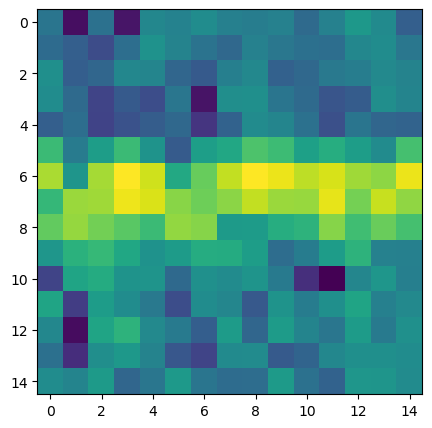

In [14]:
X_w = []
Y_w = []
back = 10
for key, label in zip(keys,labels):
    print(key)
    if key == 'samples' or key == 'background': continue
    img  = matplotlib.image.imread('img/'+key+'.png')
    frames = loaded_file[key]
    frames = helper.subtract_background(background, frames)
    spects,y = helper.gen_n_diff_spect(frames, distances=distances)
    trajectory = img[:,:,0] == 0
    trajectory_extended = np.repeat(trajectory,10, axis=1)
    _, x = spects[0].shape
    _, y = trajectory_extended.shape
    trajectory_extended = trajectory_extended[:,:min(x,y)]
    normalized_spects = [helper.normalize(s[:max_depth,:min(x,y)]) for s in spects]
    normalized_spects = np.array(normalized_spects)
    y, x = np.where(trajectory_extended == 1)

    for x_pos, y_pos in zip(x,y):
        y_dim = window_size[1] // 2
        x_dim = window_size[0]
        window = normalized_spects[:,
                                    y_pos-y_dim:y_pos+y_dim+1,
                                    x_pos-x_dim:x_pos]
        if window[0].shape == window_size:
            plt.imshow(window[0])
            X_w.append(window)
            Y_w.append(label)


X_w = np.array(X_w)
Y_w = np.array(Y_w)

In [15]:
X_w.shape

(81103, 6, 15, 15)

In [16]:
Y_w.shape

(81103,)

In [17]:
np.save('data/class/X'+str(window_size), X_w)
np.save('data/class/Y'+str(window_size), Y_w)

In [209]:
img  = matplotlib.image.imread('img/kuba.png')
frames = loaded_file['kuba']
frames = helper.subtract_background(background, frames)
spects,y = helper.gen_n_diff_spect(frames, distances=distances)
trajectory = img[:,:,0] == 0
trajectory_extended = np.repeat(trajectory,10, axis=1)
_, x = spects[0].shape
_, y = trajectory_extended.shape
trajectory_extended = trajectory_extended[:,:min(x,y)]
normalized_spects = [helper.normalize(s[:max_depth,:min(x,y)]) for s in spects]
normalized_spects = np.array(normalized_spects)
y, x = np.where(trajectory_extended == 1)



In [205]:
x_pos = x[2]
y_pos = y[2]

In [206]:
y = window_size[1] // 2
x = window_size[0]
window = normalized_spects[:,
                            y_pos-y:y_pos+y+1,
                            x_pos-x:x_pos]

In [208]:
y_pos

6